In [1]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import SpatialDropout2D

import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


In [0]:
from __future__ import print_function, division

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from time import time
import matplotlib.pyplot as plt

In [0]:
import cv2
#globbing utility.
import glob
from skimage import io

In [4]:
!unzip cardataset.zip

Archive:  cardataset.zip
   creating: cardataset/X_train/
  inflating: cardataset/X_train/car1.jpg  
  inflating: cardataset/X_train/car10.jpg  
  inflating: cardataset/X_train/car100.jpg  
  inflating: cardataset/X_train/car1000.jpg  
  inflating: cardataset/X_train/car101.jpg  
  inflating: cardataset/X_train/car102.jpg  
  inflating: cardataset/X_train/car103.jpg  
  inflating: cardataset/X_train/car104.jpg  
  inflating: cardataset/X_train/car105.jpg  
  inflating: cardataset/X_train/car106.jpg  
  inflating: cardataset/X_train/car107.jpg  
  inflating: cardataset/X_train/car108.jpg  
  inflating: cardataset/X_train/car109.jpg  
  inflating: cardataset/X_train/car11.jpg  
  inflating: cardataset/X_train/car110.jpg  
  inflating: cardataset/X_train/car111.jpg  
  inflating: cardataset/X_train/car112.jpg  
  inflating: cardataset/X_train/car113.jpg  
  inflating: cardataset/X_train/car114.jpg  
  inflating: cardataset/X_train/car115.jpg  
  inflating: cardataset/X_train/car116.jpg  


In [0]:
def Read_Images(TargetPath):
  car_images = []
  print("Targetpath is",TargetPath)
  #path = 'RAW_Image_Resized/*.*'
  path = '/content/cardataset/X_train/*.*'
  for bb,file in enumerate (glob.glob(path)):
    print("bb is",bb)
    print("file is",file)
    img = io.imread(file,plugin='matplotlib')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    car_images.append(img)
  car_images = np.asarray(car_images)
  return car_images

In [0]:
# import os
# from os import listdir
# from PIL import Image

# dir_path = "/content/indiancars/i10"


# for filename in listdir(dir_path):
#     if filename.endswith('.jpg'):
#         try:
#             img = Image.open(dir_path+"\\"+filename) # open the image file
#             img.verify() # verify that it is, in fact an image
#         except (IOError, SyntaxError) as e:
#             print('Bad file:', filename)
#             #os.remove(base_dir+"\\"+filename) (Maybe)

In [6]:
car_images = Read_Images('/content/cardataset/X_train')

Targetpath is /content/cardataset/X_train
bb is 0
file is /content/cardataset/X_train/car538.jpg
bb is 1
file is /content/cardataset/X_train/car406.jpg
bb is 2
file is /content/cardataset/X_train/car845.jpg
bb is 3
file is /content/cardataset/X_train/car303.jpg
bb is 4
file is /content/cardataset/X_train/car86.jpg
bb is 5
file is /content/cardataset/X_train/car834.jpg
bb is 6
file is /content/cardataset/X_train/car368.jpg
bb is 7
file is /content/cardataset/X_train/car115.jpg
bb is 8
file is /content/cardataset/X_train/car374.jpg
bb is 9
file is /content/cardataset/X_train/car563.jpg
bb is 10
file is /content/cardataset/X_train/car256.jpg
bb is 11
file is /content/cardataset/X_train/car917.jpg
bb is 12
file is /content/cardataset/X_train/car270.jpg
bb is 13
file is /content/cardataset/X_train/car372.jpg
bb is 14
file is /content/cardataset/X_train/car913.jpg
bb is 15
file is /content/cardataset/X_train/car212.jpg
bb is 16
file is /content/cardataset/X_train/car761.jpg
bb is 17
file is 

In [7]:
car_images.shape

(1000, 100, 100, 3)

In [0]:
# from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator()
#X_train = train_datagen.flow_from_directory('/content/cardataset')

In [0]:
X_train = car_images

In [9]:
X_train.shape[0]

1000

In [10]:
class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 100
        self.img_cols = 100
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256 * 6 * 6, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((6, 6, 256)))
        model.add(UpSampling2D())
        model.add(Conv2D(256, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))       
        model.add(UpSampling2D())
        model.add(Conv2D(256, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu")) 
        model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))    , 
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))            
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25)) 
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))       
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, dataset, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        X_train = dataset

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        #X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        seconds_elapsed = 0
        for epoch in range(epochs):
            start_time = time()

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # If at save interval => save generated image samples
            if epoch !=0:
              if epoch % save_interval == 0:
                  self.save_imgs(epoch)

            end_time = time()
            seconds_elapsed += end_time - start_time
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [Seconds Elapsed: %d]" % (epoch, d_loss[0], 100*d_loss[1], g_loss,seconds_elapsed))
      

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("/content/images%d.png" % epoch)
        plt.close()


if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(car_images, epochs=50000, batch_size=64, save_interval=50)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 26, 26, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256  

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 1.501823, acc.: 28.91%] [G loss: 0.357885] [Seconds Elapsed: 9]
1 [D loss: 0.995130, acc.: 48.44%] [G loss: 0.847464] [Seconds Elapsed: 9]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2 [D loss: 0.858700, acc.: 48.44%] [G loss: 1.440441] [Seconds Elapsed: 9]
3 [D loss: 0.877181, acc.: 46.88%] [G loss: 1.332318] [Seconds Elapsed: 10]
4 [D loss: 0.739229, acc.: 54.69%] [G loss: 1.102860] [Seconds Elapsed: 10]
5 [D loss: 0.564470, acc.: 71.09%] [G loss: 1.030094] [Seconds Elapsed: 10]
6 [D loss: 0.398984, acc.: 85.94%] [G loss: 1.112662] [Seconds Elapsed: 10]
7 [D loss: 0.284725, acc.: 92.19%] [G loss: 0.985674] [Seconds Elapsed: 10]
8 [D loss: 0.342770, acc.: 88.28%] [G loss: 0.802685] [Seconds Elapsed: 10]
9 [D loss: 0.766190, acc.: 58.59%] [G loss: 0.521736] [Seconds Elapsed: 11]
10 [D loss: 1.570253, acc.: 37.50%] [G loss: 0.762766] [Seconds Elapsed: 11]
11 [D loss: 0.935338, acc.: 51.56%] [G loss: 1.207280] [Seconds Elapsed: 11]
12 [D loss: 0.697126, acc.: 70.31%] [G loss: 1.095518] [Seconds Elapsed: 11]
13 [D loss: 0.264666, acc.: 91.41%] [G loss: 0.615667] [Seconds Elapsed: 11]
14 [D loss: 0.279721, acc.: 90.62%] [G loss: 0.607441] [Seconds Elapsed: 12]
15 [D lo

In [14]:
pwd

'/content'

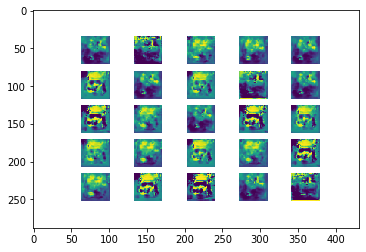

In [16]:
# !rm -rf 'images'
img = io.imread('/content/images49950.png')
plt.imshow(img)

In [0]:
#To create video
def Write_Video(image_folder,video_name):
  import cv2
  import os
  images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape

  video = cv2.VideoWriter(video_name, 0, 1, (width,height))

  for image in images:
      img = cv2.imread(os.path.join(image_folder, image))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      video.write(img)

  cv2.destroyAllWindows()
  video.release()
Video_file_name = 'DcGAN.mp4'
Write_Video('images_dcgan',Video_file_name)  
Upload_Images_to_Drive(Video_file_name,'EVA_Phase_1/Session_25/')